# Thompson Sampling
----

### Concept
- Thompson Sampling is one of method used in MAB system.
- It Estimates the distribution of values instead of directly estimating the expected reward for a case.
- Probabilistically, it can be said that the expected reward for the case is made in PDF.
- And through this, when selecting the next case, the value is randomly extracted from this distribution and the highest one is selected. And from that reward, iteratively performs the work of updating the distribution of values using Bayes' theorem.
- Many recommendation systems already use this. (Netflix, Uber, Naver, Kakao..)
- In this chapter, we study about thompson sampling with mab.

### Using Beta Distribution

$$ Q_t(A) = \frac{x^{\alpha-1} (1-x)^{\beta-1} }{B(\alpha, \beta)} $$

- Beta distribution can be used in recommendation system.

$$ \alpha = clicked \, count \, + \, 1$$

$$ \beta = impression \, count \, - \, clicked \, count \, + \, 1$$

- the below code show distribution of items(in recsys).

In [3]:
# This code is from the link below
# https://github.com/chris-chris/bandits-baseline/blob/master/beta.py

from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

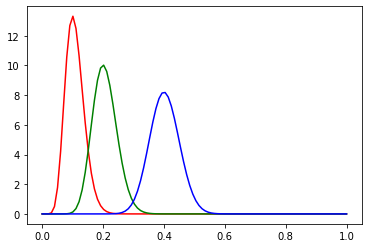

In [31]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)

# item logs
item1 = [10, 100]  # CTR 20%
item2 = [20, 100]  # CTR 20%
item3 = [40, 100]  # CTR 40%

ax.plot(x, beta.pdf(x, item1[0]+1, item1[1]-item1[0]+1), 'r')
ax.plot(x, beta.pdf(x, item2[0]+1, item2[1]-item2[0]+1), 'g')
ax.plot(x, beta.pdf(x, item3[0]+1, item3[1]-item3[0]+1), 'b')

In [32]:
item1_rvs = beta.rvs(item1[0]+1, item1[1]-item1[0]+1, size=1)
item2_rvs = beta.rvs(item2[0]+1, item2[1]-item2[0]+1, size=1)
item3_rvs = beta.rvs(item3[0]+1, item3[1]-item3[0]+1, size=1)
print(item1_rvs)
print(item2_rvs)
print(item3_rvs)

[0.10791849]
[0.23552932]
[0.40851855]


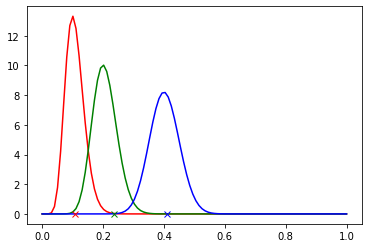

In [33]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)

ax.plot(x, beta.pdf(x, item1[0]+1, item1[1]-item1[0]+1), 'r')
ax.plot(x, beta.pdf(x, item2[0]+1, item2[1]-item2[0]+1), 'g')
ax.plot(x, beta.pdf(x, item3[0]+1, item3[1]-item3[0]+1), 'b')
ax.plot(item1_rvs, 0, 'x', color='r')
ax.plot(item2_rvs, 0, 'x', color='g')
ax.plot(item3_rvs, 0, 'x', color='b')

----

### In Recommender System
- In greedy MAB or UCB MAB system, the winner is item 3. Because it has the highest CTR empirically.
- But in Thompson sampling, result of sampling is the action.
- In this situation, item 2 or item 1 could be the winner because the distribution has not yet converged.
- If the winner in this round is item 2, and next impression item is also item 2.
- As a result of this exposure, the alpha and beta are updated again and the above process is repeated over and over again.
- Accordingly, the distribution of each item is naturally determined.
- And the exposure probability of the item is determined according to the distribution.

In [50]:
import random

item1 = [10, 100]
item2 = [20, 100]
item3 = [40, 100]
item_list = [item1, item2, item3]

for i in range(1000):
    # 베타 분포 기반 샘플링 : 가장 샘플링 값이 큰 item 선택
    item1_rvs = beta.rvs(item_list[0][0]+1, item_list[0][1]-item_list[0][0]+1, size=1)
    item2_rvs = beta.rvs(item_list[1][0]+1, item_list[1][1]-item_list[1][0]+1, size=1)
    item3_rvs = beta.rvs(item_list[2][0]+1, item_list[2][1]-item_list[2][0]+1, size=1)
    rvs_list = [item1_rvs, item2_rvs, item3_rvs]
    max_result_item_index = rvs_list.index(max(rvs_list))

    # 현재까지의 CTR을 확률로 하여 조회 여부를 시뮬레이션
    exposure_item = item_list[max_result_item_index]
    prob_by_ctr = exposure_item[0] / exposure_item[1]
    is_click = random.choices(
        population = [True, False],
        weights = [prob_by_ctr, 1-prob_by_ctr]
    )
    
    # 시뮬레이션 결과에 따라 item status 업데이트
    if is_click[0]:  # click count ++
        item_list[max_result_item_index][0] += 1
    item_list[max_result_item_index][1] += 1  # impression(exposure) count ++

In [51]:
print(item_list)

[[10, 100], [20, 100], [411, 1100]]


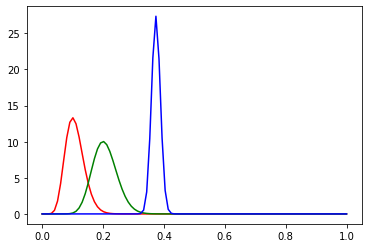

In [52]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)
ax.plot(x, beta.pdf(x, item_list[0][0]+1, item_list[0][1]-item_list[0][0]+1), 'r')
ax.plot(x, beta.pdf(x, item_list[1][0]+1, item_list[1][1]-item_list[1][0]+1), 'g')
ax.plot(x, beta.pdf(x, item_list[2][0]+1, item_list[2][1]-item_list[2][0]+1), 'b')

----

### Regret in MAB
- regret is a concept of loss
- it can be said that the reward in the most ideal situation minus the reward when the action was taken according to the current policy.
- In Summary, it can be defined like this. $ REGRET \, = \, (Ideal \, reward) - (Current \, reward \, based \, on \, current \, policy) $
- But in real world, we couldn't know about the ideal reward. So, we have to calculate the expectation belongs.

$$ Regret = E(\sum_{t=1}^{T}( \mu_t^* - \mu_t) ) $$

- And there are some notations

$$ \mu_t^* \, : \, ideal \, reward \, in \, time \, t $$
$$ \mu_t \, : \, expected \, reward \, in \, time \, t $$
$$ \Delta_i : = \, \mu^* \, - \, \mu_i $$

- Also, let $ k_i(t) $ denote the number of times arm $i$ has been played up to step $t$ − 1

$$ Regret = E(\sum_{t=1}^{T}( \mu_t^* - \mu_t) ) = (\sum_{i} \Delta_i E[k_i(T+1)] $$

----

### Regret Bounds for Thompson Sampling
- In TS-MAB problem, for arm $i$ the probability of success (reward =1) is $\mu_i$ [0~1]
- So, $\mu_{i(t)}$ is CTR in recommender system's expected reward (time $t$ when play arm $i$)
- Ideal reward is most higher CTR(item $i$'s) in time $t$
- Expected reward is expected CTR based on beta distribution in time $t-1$


In [ ]:
# pseudocode
regret_in_t = 0
for expected_reward_in_t-1 in arms:
    regret_ratio = ideal_reward_in_t - expected_reward_in_t-1
    regret_in_t += regret_ratio * (arm's expected play count in t, or real play count in t)
normalized_regret_in_t = regret_in_t / (whole play count)

----
- https://arxiv.org/pdf/1209.3353.pdf
- https://www.cs.umd.edu/~slivkins/CMSC858G-fall16/Lecture%205.pdf